In [ ]:
import sklearn
import keras
import nltk
import pandas as pd
import numpy as np
import re
import codecs


In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


In [ ]:
jan = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-01-01_2020-01-31.tsv", sep='\t', header=0)

#feb = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByCountry_2020-02-01_2020-02-29.tsv", sep='\t', header=0)

mar = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-03-01_2020-03-31.tsv", sep='\t', header=0)

apr = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-04-01_2020-04-30.tsv", sep='\t', header=0)

may = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-05-01_2020-05-31.tsv", sep='\t', header=0)

#jun = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-06-01_2020-06-30.tsv", sep='\t', header=0)

#jul =pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-07-01_2020-07-31.tsv", sep='\t', header=0)

#aug = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-08-01_2020-08-31.tsv", sep='\t', header=0)

#sep = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-09-01_2020-09-30.tsv", sep='\t', header=0)

#oct = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-10-01_2020-10-31.tsv", sep='\t', header=0)

#nov = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-11-01_2020-11-30.tsv", sep='\t', header=0)

#dec = pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2020/QueriesByState_2020-12-01_2020-12-31.tsv", sep='\t', header=0)

jan21= pd.read_csv("https://raw.githubusercontent.com/microsoft/BingCoronavirusQuerySet/master/data/2021/QueriesByState_2021-01-01_2021-01-31.tsv", sep='\t', header=0)


In [ ]:
df = pd.concat([jan, apr, may, mar, jan21], ignore_index=True)





In [ ]:
print(df.sample(5))

               Date  ... PopularityScore
1919215  2020-03-19  ...               5
2774154  2021-01-18  ...              56
1150908  2020-05-19  ...               1
519037   2020-04-17  ...               3
2452050  2021-01-01  ...               7

[5 rows x 6 columns]


In [ ]:
def standardize_text(df, text_field):
    df[text_field] = df[text_field].str.replace(r"http\S+", "")
    df[text_field] = df[text_field].str.replace(r"http", "")
    df[text_field] = df[text_field].str.replace(r"@\S+", "")
    df[text_field] = df[text_field].str.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    df[text_field] = df[text_field].str.replace(r"@", "at")
    df[text_field] = df[text_field].str.lower()
    df[text_field] = df[text_field].str.replace(r"\b\d+(?:\.\d+)?\s+", " ") # remove numbers from strings
    df[text_field] = df[text_field].str.replace(r"[^a-zA-Z]", " ")# Search for all non-letters,  Replace all non-letters with spaces
    return df



In [ ]:
questions = standardize_text(df, "Query")

questions.to_csv("clean_data.csv")
questions.head()

,Date,Query,IsImplicitIntent,State,Country,PopularityScore
0,2020-01-01,coronavirus,False,Michigan,United States,1
1,2020-01-01,coronavirus,False,Pennsylvania,United States,1
2,2020-01-01,p masks,True,Australian Capital Territory,Australia,1
3,2020-01-01,ausw rtiges amt,True,North Rhine-Westphalia,Germany,1
4,2020-01-01,p masks,True,New South Wales,Australia,1


In [ ]:
clean_questions1= pd.read_csv("clean_data.csv")
clean_questions1.tail()



,Unnamed: 0,Date,Query,IsImplicitIntent,State,Country,PopularityScore
3023975,3023975,2021-01-31,mi argentina,True,Buenos Aires Province,Argentina,100
3023976,3023976,2021-01-31,pokemon go,True,Texas,United States,2
3023977,3023977,2021-01-31,top news local,True,South Carolina,United States,2
3023978,3023978,2021-01-31,sa covid restrictions,False,South Australia,Australia,7
3023979,3023979,2021-01-31,pcr test,True,Lower Saxony,Germany,2


In [ ]:
clean_questions = clean_questions1.loc[clean_questions1.Query.str.contains("how", na=False)]

In [ ]:
clean_questions['Query']=clean_questions['Query'].apply(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

clean_questions["tokens"] = clean_questions['Query'].apply(tokenizer.tokenize)
clean_questions.head()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """


,Unnamed: 0,Date,Query,IsImplicitIntent,State,Country,PopularityScore,tokens
8347,8347,2020-01-24,how did the coronavirus start,False,Texas,United States,1,"[how, did, the, coronavirus, start]"
9111,9111,2020-01-24,how is coronavirus spread,False,New York,United States,1,"[how, is, coronavirus, spread]"
9116,9116,2020-01-24,how is the coronavirus transmitted,False,New York,United States,1,"[how, is, the, coronavirus, transmitted]"
9346,9346,2020-01-24,how is coronavirus spread,False,Illinois,United States,1,"[how, is, coronavirus, spread]"
9356,9356,2020-01-24,how is coronavirus transmitted,False,Illinois,United States,1,"[how, is, coronavirus, transmitted]"


In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

all_words = [word for tokens in clean_questions["tokens"] for word in tokens]
sentence_lengths = [len(tokens) for tokens in clean_questions["tokens"]]
VOCAB = sorted(list(set(all_words)))
print("%s words total, with a vocabulary size of %s" % (len(all_words), len(VOCAB)))
print("Max sentence length is %s" % max(sentence_lengths))

296728 words total, with a vocabulary size of 773
Max sentence length is 34


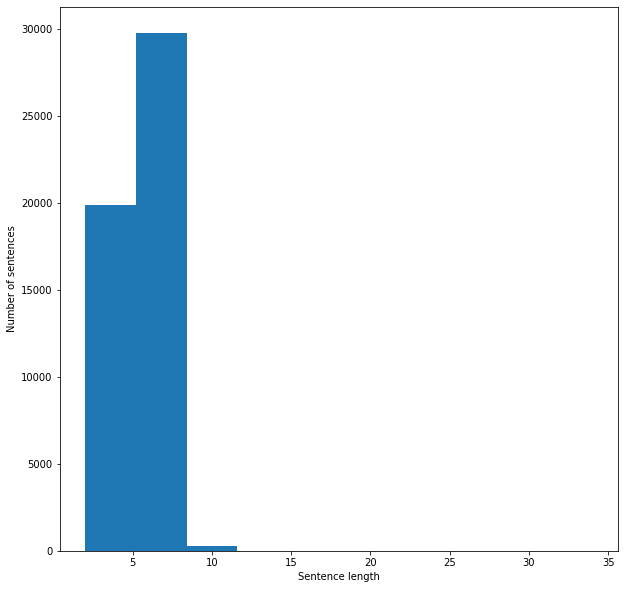

In [ ]:
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(10, 10)) 
plt.xlabel('Sentence length')
plt.ylabel('Number of sentences')
plt.hist(sentence_lengths)
plt.show()


In [ ]:
from sklearn.model_selection import train_test_split

list_corpus = clean_questions["Query"].apply(str)

train, test = train_test_split(list_corpus, test_size = 0.2, random_state=40)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

def cv(data):
    Tfidf_vectorizer = TfidfVectorizer()

    emb = Tfidf_vectorizer.fit_transform(data)

    return emb, Tfidf_vectorizer


X_train_counts, Tfidf_vectorizer = cv(train)
X_test_counts = Tfidf_vectorizer.transform(test)

In [ ]:
test = test.to_string()
type(test)

str

In [ ]:
def ie_preprocess(document):
    """This function takes raw text and chops and then connects the process to break     
       it down into sentences, then words and then complete part-of-speech tagging"""
    sentences = nltk.sent_tokenize(document)
    sentences = [nltk.word_tokenize(sent) for sent in sentences]
    sentences = [nltk.pos_tag(sent) for sent in sentences]
    return sentences

In [ ]:
sentence = ie_preprocess(test)




In [ ]:
grammar =  r"""
  NP: 
    {<.*>+}
    }<CD>+{      # Chink cardinal digit CD"
         
"""
cp = nltk.RegexpParser(grammar)
chunked = []
for s in sentence:
    chunked.append(cp.parse(s))

print(chunked)

[Tree('S', [('66985', 'CD'), Tree('NP', [('how', 'WRB'), ('long', 'RB'), ('does', 'VBZ'), ('coronavirus', 'VB'), ('live', 'VB'), ('on', 'IN'), ('surfaces', 'NNS')]), ('1495464', 'CD'), Tree('NP', [('how', 'WRB'), ('to', 'TO'), ('prevent', 'VB'), ('coronavirus', 'NN')]), ('3003026', 'CD'), Tree('NP', [('how', 'WRB'), ('many', 'JJ'), ('deaths', 'NNS'), ('today', 'NN')]), ('2122703', 'CD'), Tree('NP', [('how', 'WRB'), ('is', 'VBZ'), ('coronavirus', 'JJ'), ('spread', 'NN')]), ('2396663', 'CD'), Tree('NP', [('how', 'WRB'), ('does', 'VBZ'), ('coronavirus', 'VB'), ('kill', 'VB')]), ('105120', 'CD'), Tree('NP', [('how', 'WRB'), ('many', 'JJ'), ('cases', 'NNS'), ('of', 'IN'), ('coronavirus', 'NN')]), ('2378246', 'CD'), Tree('NP', [('how', 'WRB'), ('many', 'JJ'), ('people', 'NNS'), ('have', 'VBP'), ('died', 'VBN'), ('from', 'IN'), ('coronavirus', 'NN')]), ('1691004', 'CD'), Tree('NP', [('how', 'WRB'), ('long', 'RB'), ('does', 'VBZ'), ('coronavirus', 'VB'), ('last', 'JJ')]), ('2522161', 'CD'), Tr

In [ ]:
#from nltk.corpus import conll2000
#import nltk
#nltk.download('brown')
#nltk.download('conll2000')
#cp = nltk.RegexpParser('CHUNK: {<V.*> <TO> <V.*>}')
b#rown = nltk.corpus.brown
#for sent in brown.tagged_sents():
 #   tree = cp.parse(chunked)
 #   for subtree in tree.subtrees():
 #        if subtree.label() == 'CHUNK': 
  #        pass
  #        print(subtree)

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


KeyboardInterrupt: ignored

In [ ]:
print(cp.evaluate(chunked))

ChunkParse score:
    IOB Accuracy: 100.0%%
    Precision:    100.0%%
    Recall:       100.0%%
    F-Measure:    100.0%%


In [ ]:
def get_most_important_features(vectorizer, model, n=5):
    index_to_word = {v:k for k,v in vectorizer.vocabulary_.items()}
    
    # loop for each class
    classes ={}
    for class_index in range(model.coef_.shape[0]):
        word_importances = [(el, index_to_word[i]) for i,el in enumerate(model.coef_[class_index])]
        sorted_coeff = sorted(word_importances, key = lambda x : x[0], reverse=True)
        tops = sorted(sorted_coeff[-n:], key = lambda x : x[0])
        bottom = sorted_coeff[:n]
        classes[class_index] = {
            'tops':tops,
            'bottom':bottom
        }
    return classes

importance = get_most_important_features(Tfidf_vectorizer, clf, 15)

In [ ]:
importance


{0: {'bottom': [(5.548594956071666, 'oi'),
   (5.164976430688839, 'fight'),
   (3.55308143447447, 'cronavirus'),
   (3.4807377273169027, 'daily'),
   (3.3644283647393385, 'ca'),
   (3.3210472052318134, 'broward'),
   (3.1392062035978205, 'delaware'),
   (3.1392062035978205, 'ma'),
   (2.980599815543778, 'make'),
   (2.979386598315798, 'bay'),
   (2.979386598315798, 'lockdown'),
   (2.96489890987258, 'normally'),
   (2.9134071345410018, 'england'),
   (2.9134071345410018, 'london'),
   (2.9062029795128224, 'alberta')],
  'tops': [(-19.760584981475926, 'catch'),
   (-6.015366961215947, 'casesin'),
   (-3.082293861827247, 'cornavirus'),
   (-3.022078077398119, 'check'),
   (-2.1534845379059018, 'due'),
   (-1.8884555788145814, 'day'),
   (-1.7848801277192399, 'most'),
   (-1.752909679982965, 'bolingbrook'),
   (-1.7176307053506894, 'confirmed'),
   (-1.6221281171384754, 'funding'),
   (-1.4255871577367527, 'if'),
   (-1.3553823379080436, 'interactive'),
   (-1.342180688313163, 'iknow'),
 

In [ ]:
  def plot_important_words(top_scores, top_words, bottom_scores, bottom_words, name):
    y_pos = np.arange(len(top_words))
    top_pairs = [(a,b) for a,b in zip(top_words, top_scores)]
    top_pairs = sorted(top_pairs, key=lambda x: x[1])
    
    bottom_pairs = [(a,b) for a,b in zip(bottom_words, bottom_scores)]
    bottom_pairs = sorted(bottom_pairs, key=lambda x: x[1], reverse=True)
    
    top_words = [a[0] for a in top_pairs]
    top_scores = [a[1] for a in top_pairs]
    
    bottom_words = [a[0] for a in bottom_pairs]
    bottom_scores = [a[1] for a in bottom_pairs]
    
    fig = plt.figure(figsize=(10, 10))  

    plt.subplot(121)
    plt.barh(y_pos,bottom_scores, align='center', alpha=0.5)
    plt.title('Relevant', fontsize=20)
    plt.yticks(y_pos, bottom_words, fontsize=14)
    plt.suptitle('Key words', fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplot(122)
    plt.barh(y_pos,top_scores, align='center', alpha=0.5)
    plt.title('Irrelevant', fontsize=20)
    plt.yticks(y_pos, top_words, fontsize=14)
    plt.suptitle(name, fontsize=16)
    plt.xlabel('Importance', fontsize=20)
    
    plt.subplots_adjust(wspace=0.8)
    plt.show()



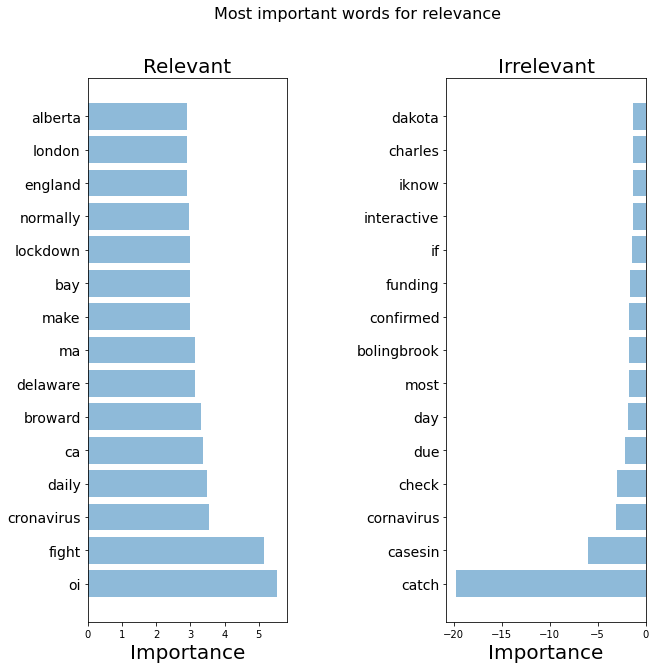

In [ ]:
top_scores = [a[0] for a in importance[0]['tops']]
top_words = [a[1] for a in importance[0]['tops']]
bottom_scores = [a[0] for a in importance[0]['bottom']]
bottom_words = [a[1] for a in importance[0]['bottom']]

plot_important_words(top_scores, top_words, bottom_scores, bottom_words, "Most important words for relevance")

In [ ]:
import gensim.downloader as api

word2vec= api.load('word2vec-google-news-300')


[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
import os
import tweepy as tw
import pandas as pd

In [ ]:
consumer_key= ''
consumer_secret= ''
access_token= ''
access_token_secret= ''

In [ ]:
auth = tw.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tw.API(auth, wait_on_rate_limit=True)

In [ ]:
# Define the search term and the date_since date as variables
new_search = "#corona -filter:retweets"
date_since = "2021-04-01"

In [ ]:
# Collect tweets
tweets = tw.Cursor(api.search,
                       q=search_words,
                       lang="en",
                       since=date_since).items(5)

# Collect a list of tweets
tweett =[tweet.text for tweet in tweets]



In [ ]:
tweets = tw.Cursor(api.search, 
                           q=new_search,
                           lang="en",
                           since=date_since).items(10)

tweett = [[tweet.user.screen_name, tweet.user.location, tweet.created_at, tweet.text] for tweet in tweets]


In [ ]:
tweet_text = pd.DataFrame(data=tweett, 
                    columns=['user', 'location', 'date', 'text'])


In [ ]:
 from pandas import Series
  
#tweet_text['text'].str.split('((?:<a href=")?https?://\S+[^\s,.:;])').apply(Series, 1).stack()
def faster(df):
    s = tweet_text['text'].str.split('((?:<a href=")?https?://\S+[^\s,.:;])', expand=True).stack()
    i = s.index.get_level_values(0)
    df2 = df.loc[i].copy()
    df2["gene"] = s.values
    return df2

new=faster(tweet_text)
new
tweet_text1=new[new['gene'].str.contains("https")]
tweet_text1

,user,location,date,text,gene
0,PGofficials,"New Delhi, India",2021-05-03 14:46:03,Complete lockdown may take place across the co...,https://t.co/Xqxpk2W7Tl
1,Rhys604,,2021-05-03 14:44:43,"Good luck, Florida. 🙄😢\n\n#RonDesantis #ShameO...",https://t.co/GIb9vzaRIm
3,Ishumertia,,2021-05-03 14:43:59,Irresponsible approach of the Chirayu hospital...,https://t.co/hkeNgfXe2U
4,MedipaxHealth,India,2021-05-03 14:43:18,Medipax Healthcare is Now the Official Authori...,https://t.co/BBGamVFYIj
5,SurenddraGupta,"Mumbai, India",2021-05-03 14:43:18,Great Initiative. Much more war footing steps ...,https://t.co/fqCh2OCAhA
6,KunwarSharma14,,2021-05-03 14:42:31,"@realtornette India again tops the chart for ""...",https://t.co/ah8JoJ4CuF
7,yogaashramingoa,"Goa, India",2021-05-03 14:42:25,Upcoming courses - https://t.co/oqbJWjxdJI\n\n...,https://t.co/oqbJWjxdJI
7,yogaashramingoa,"Goa, India",2021-05-03 14:42:25,Upcoming courses - https://t.co/oqbJWjxdJI\n\n...,https://t.co/MzJp1XO0Sz
8,teamy4bf,India,2021-05-03 14:42:04,Sorry @ManMundra cause @BJP4India AND their id...,https://t.co/zESh2v5iL2
9,NehaVer36753697,"Saharanpur, India",2021-05-03 14:41:58,@DSSNewsUpdates @derasachasauda @Gurmeetramrah...,https://t.co/HlH877eSvt


In [ ]:
tweet_text1= standardize_text(tweet_text1, "text")

tweet_text2 = tweet_text1["text"].to_string()
type(tweet_text2)


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

str

In [ ]:
chunked_tweet= ie_preprocess(tweet_text2)
type(chunked_tweet)


list

In [ ]:
print(tweet_text1)

              user           location                date                                                                                                                   text                     gene
0      PGofficials   New Delhi, India 2021-05-03 14:46:03  complete lockdown may take place across the country for    days  ready to fight decisive battle with corona  milita    https://t.co/Xqxpk2W7Tl
1          Rhys604                    2021-05-03 14:44:43              good luck  florida       rondesantis  shameonron  covid  coronavirus  coronasecondwave  corona  florida    https://t.co/GIb9vzaRIm
3       Ishumertia                    2021-05-03 14:43:59  irresponsible approach of the chirayu hospital hathoj  kalwar road  and the lack of support and negligence of the m    https://t.co/hkeNgfXe2U
4    MedipaxHealth              India 2021-05-03 14:43:18  medipax healthcare is now the official authorized pan india seller of eva pharma for remdesivir   contact us for mo    https://t.co/B

In [ ]:
print(chunked1)

[Tree('S', [('0', 'CD'), Tree('NP', [('complete', 'JJ'), ('lockdown', 'NN')]), ('may', 'MD'), ('take', 'VB'), Tree('NP', [('place', 'NN')]), ('across', 'IN'), Tree('NP', [('the', 'DT'), ('co', 'NN')]), ('...', ':'), ('1', 'CD'), Tree('NP', [('good', 'JJ'), ('luck', 'NN')]), Tree('NP', [('florida', 'NN')]), Tree('NP', [('rondesantis', 'NN')]), Tree('NP', [('shameonr', 'NN')]), ('...', ':'), ('3', 'CD'), Tree('NP', [('irresponsible', 'JJ'), ('approach', 'NN')]), ('of', 'IN'), Tree('NP', [('the', 'DT'), ('chirayu', 'NN')]), Tree('NP', [('hospital', 'NN')]), ('...', ':'), ('4', 'CD'), Tree('NP', [('medipax', 'NN')]), Tree('NP', [('healthcare', 'NN')]), ('is', 'VBZ'), ('now', 'RB'), Tree('NP', [('the', 'DT'), ('official', 'NN')]), Tree('NP', [('authori', 'NN')]), ('...', ':'), ('5', 'CD'), ('great', 'JJ'), ('initiative', 'JJ'), ('much', 'RB'), ('more', 'RBR'), Tree('NP', [('war', 'NN')]), ('footing', 'VBG'), ('steps', 'NNS'), ('...', ':'), ('6', 'CD'), Tree('NP', [('india', 'NN')]), ('again

In [ ]:
print(chunked)

[Tree('S', [('66985', 'CD'), ('how', 'WRB'), ('long', 'RB'), ('does', 'VBZ'), ('coronavirus', 'VB'), ('live', 'VB'), ('on', 'IN'), ('surfaces', 'NNS'), ('1495464', 'CD'), ('how', 'WRB'), ('to', 'TO'), ('prevent', 'VB'), Tree('NP', [('coronavirus', 'NN')]), ('3003026', 'CD'), ('how', 'WRB'), ('many', 'JJ'), ('deaths', 'NNS'), Tree('NP', [('today', 'NN')]), ('2122703', 'CD'), ('how', 'WRB'), ('is', 'VBZ'), Tree('NP', [('coronavirus', 'JJ'), ('spread', 'NN')]), ('2396663', 'CD'), ('how', 'WRB'), ('does', 'VBZ'), ('coronavirus', 'VB'), ('kill', 'VB'), ('105120', 'CD'), ('how', 'WRB'), ('many', 'JJ'), ('cases', 'NNS'), ('of', 'IN'), Tree('NP', [('coronavirus', 'NN')]), ('2378246', 'CD'), ('how', 'WRB'), ('many', 'JJ'), ('people', 'NNS'), ('have', 'VBP'), ('died', 'VBN'), ('from', 'IN'), Tree('NP', [('coronavirus', 'NN')]), ('1691004', 'CD'), ('how', 'WRB'), ('long', 'RB'), ('does', 'VBZ'), ('coronavirus', 'VB'), ('last', 'JJ'), ('2522161', 'CD'), ('how', 'WRB'), ('to', 'TO'), ('get', 'VB'),

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"
cp1 = nltk.RegexpParser(grammar)
chunked1 = []
for s in chunked_tweet:
    chunked1.append(cp1.parse(s))

print(chunked1)

[Tree('S', [('0', 'CD'), Tree('NP', [('complete', 'JJ'), ('lockdown', 'NN')]), ('may', 'MD'), ('take', 'VB'), Tree('NP', [('place', 'NN')]), ('across', 'IN'), Tree('NP', [('the', 'DT'), ('co', 'NN')]), ('...', ':'), ('1', 'CD'), Tree('NP', [('good', 'JJ'), ('luck', 'NN')]), Tree('NP', [('florida', 'NN')]), Tree('NP', [('rondesantis', 'NN')]), Tree('NP', [('shameonr', 'NN')]), ('...', ':'), ('3', 'CD'), Tree('NP', [('irresponsible', 'JJ'), ('approach', 'NN')]), ('of', 'IN'), Tree('NP', [('the', 'DT'), ('chirayu', 'NN')]), Tree('NP', [('hospital', 'NN')]), ('...', ':'), ('4', 'CD'), Tree('NP', [('medipax', 'NN')]), Tree('NP', [('healthcare', 'NN')]), ('is', 'VBZ'), ('now', 'RB'), Tree('NP', [('the', 'DT'), ('official', 'NN')]), Tree('NP', [('authori', 'NN')]), ('...', ':'), ('5', 'CD'), ('great', 'JJ'), ('initiative', 'JJ'), ('much', 'RB'), ('more', 'RBR'), Tree('NP', [('war', 'NN')]), ('footing', 'VBG'), ('steps', 'NNS'), ('...', ':'), ('6', 'CD'), Tree('NP', [('india', 'NN')]), ('again

In [ ]:
print(cp1.evaluate(chunked1))

ChunkParse score:
    IOB Accuracy: 100.0%%
    Precision:    100.0%%
    Recall:       100.0%%
    F-Measure:    100.0%%


In [ ]:
def get_average_word2vec(tokens_list, vector, generate_missing=False, k=300):
    if len(tokens_list)<1:
        return np.zeros(k)
    if generate_missing:
        vectorized = [vector[word] if word in vector else np.random.rand(k) for word in tokens_list]
    else:
        vectorized = [vector[word] if word in vector else np.zeros(k) for word in tokens_list]
    length = len(vectorized)
    summed = np.sum(vectorized, axis=0)
    averaged = np.divide(summed, length)
    return averaged


def get_word2vec_embeddings1(vectors, mediuim_df, generate_missing=False):
    embeddings1 = mediuim_df['tokens'].apply(lambda x: get_average_word2vec(x, vectors, 
                                                                                generate_missing=generate_missing))
    return list(embeddings1)

In [ ]:
from scipy.spatial.distance import cosine

# Calculating the distance between the
# embeddings of 'bank' in all the
# given contexts of the word

list_of_distances = []
for text1, embed1 in zip(tweet_text1["text"], chunked1):
    for text2, embed2 in zip(clean_questions["Query"], chunked):
        cos_dist =1- cosine(embed1, embed2)
        list_of_distances.append([clean_questions["Query"], tweet_text2[4], cos_dist])

distances_df = pd.DataFrame(list_of_distances, columns=['text1', 'text2', 'distance']).sort_values('distance')
distances_df


/usr/local/lib/python3.7/dist-packages/numpy/core/_asarray.py:83: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray
  return array(a, dtype, copy=False, order=order)


ValueError: ignored

In [ ]:
chunked_tweet= ie_preprocess(tweet_text2)
type(chunked_tweet)


list

In [ ]:
text2

'mar              where and how did this evil novel coronavirus start spreading   its very  immportant to know how animals play an important role in spreading    mar              where and how did this evil novel coronavirus start spreading   its very  immportant to know how animals play an important role in spreading    '

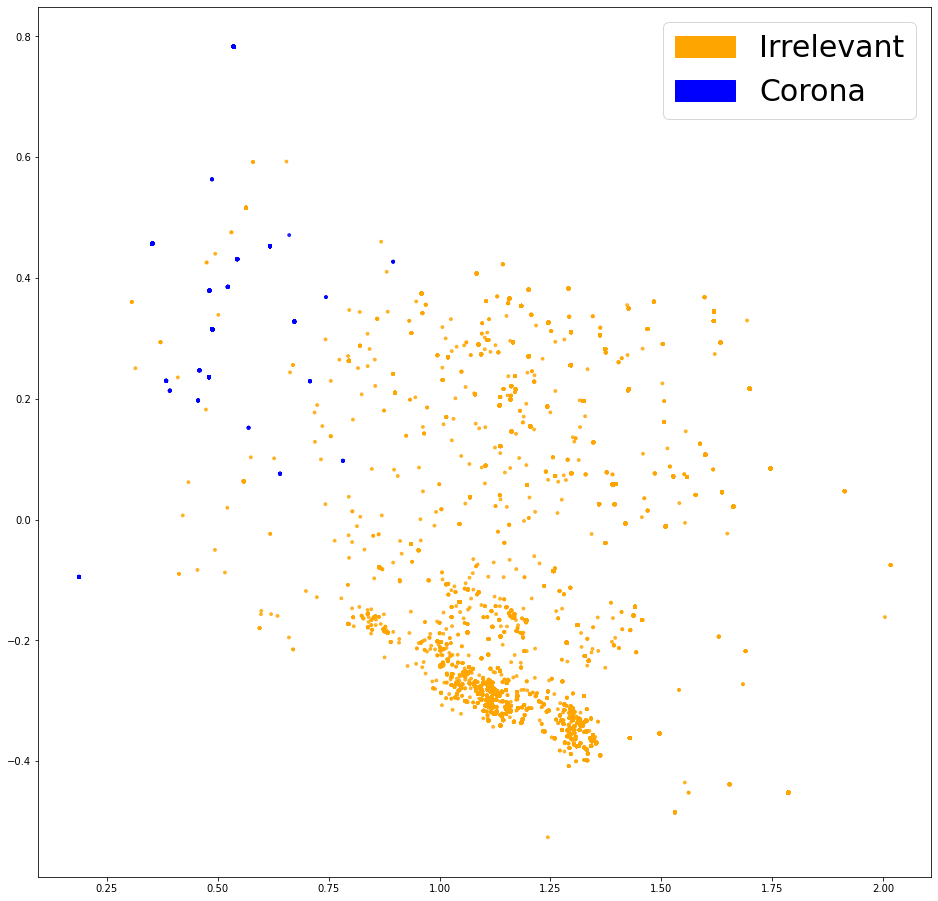

In [ ]:
fig = plt.figure(figsize=(16, 16))          
plot_LSA(embeddings, list_labels)
plt.show()

In [ ]:
clf_w2v = LogisticRegression(C=30.0, class_weight='balanced', solver='newton-cg', 
                         multi_class='multinomial', random_state=40)
clf_w2v.fit(X_train_word2vec, y_train_word2vec)
y_predicted_word2vec = clf_w2v.predict(X_test_word2vec)

In [ ]:
accuracy_word2vec, precision_word2vec, recall_word2vec, f1_word2vec = get_metrics(y_test_word2vec, y_predicted_word2vec)
print("accuracy = %.3f, precision = %.3f, recall = %.3f, f1 = %.3f" % (accuracy_word2vec, precision_word2vec, 
                                                                       recall_word2vec, f1_word2vec))

accuracy = 1.000, precision = 1.000, recall = 1.000, f1 = 1.000


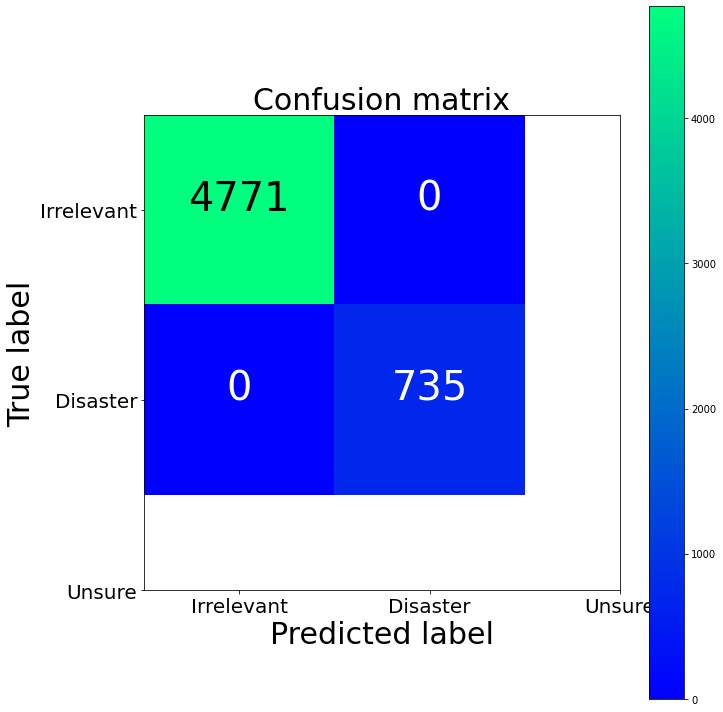

Word2Vec confusion matrix
[[4770    1]
 [   0  735]]
TFIDF confusion matrix


NameError: ignored

In [ ]:
cm_w2v = confusion_matrix(y_test_word2vec, y_predicted_word2vec)
fig = plt.figure(figsize=(10, 10))
plot = plot_confusion_matrix(cm, classes=['Irrelevant','Disaster','Unsure'], normalize=False, title='Confusion matrix')
plt.show()
print("Word2Vec confusion matrix")
print(cm_w2v)
print("TFIDF confusion matrix")
print(cm2)
print("BoW confusion matrix")
print(cm)

In [ ]:
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.utils import to_categorical

EMBEDDING_DIM = 300
MAX_SEQUENCE_LENGTH = 35
VOCAB_SIZE = len(VOCAB)

VALIDATION_SPLIT=.2
tokenizer = Tokenizer(num_words=VOCAB_SIZE)
tokenizer.fit_on_texts(clean_questions["Query"].tolist())
sequences = tokenizer.texts_to_sequences(clean_questions["Query"].tolist())

word_index = tokenizer.word_index
print('Found %s unique tokens.' % len(word_index))

cnn_data = pad_sequences(sequences, maxlen=MAX_SEQUENCE_LENGTH)
labels = to_categorical(np.asarray(clean_questions["IsImplicitIntent"]))

indices = np.arange(cnn_data.shape[0])
np.random.shuffle(indices)
cnn_data = cnn_data[indices]
labels = labels[indices]
num_validation_samples = int(VALIDATION_SPLIT * cnn_data.shape[0])

embedding_weights = np.zeros((len(word_index)+1, EMBEDDING_DIM))
for word,index in word_index.items():
    embedding_weights[index,:] = word2vec[word] if word in word2vec else np.random.rand(EMBEDDING_DIM)
print(embedding_weights.shape)

Found 514 unique tokens.
(515, 300)
